### 1. Exploração inicial dos dados

In [23]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# O '..' significa "saia para o corredor" (volte uma pasta)
caminho = '../data/raw/dados_brutos.csv'
df = pd.read_csv(caminho)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717639 entries, 0 to 3717638
Data columns (total 41 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   ano                                 int64  
 1   mes                                 int64  
 2   sigla_uf                            object 
 3   id_municipio                        int64  
 4   id_estabelecimento_cnes             int64  
 5   id_estabelecimento_cnes_familia     object 
 6   id_procedimento_ambulatorial        int64  
 7   id_servico_especializado            int64  
 8   id_classificacao_servico            int64  
 9   data_inicio_atendimento             object 
 10  data_termino_atendimento            object 
 11  permanencia_atendimento             object 
 12  motivo_saida_permanencia            int64  
 13  data_motivo_saida_permanencia       object 
 14  ano_processamento                   int64  
 15  mes_processamento                   int64  
 16  

1.1 Verificação de dados nulos:

Valores 0.00 representa que o campo não contém dados nulos.

In [29]:
df.isnull().mean().round(2)

ano                                   0.00
mes                                   0.00
sigla_uf                              0.00
id_municipio                          0.00
id_estabelecimento_cnes               0.00
id_estabelecimento_cnes_familia       0.00
id_procedimento_ambulatorial          0.00
id_servico_especializado              0.00
id_classificacao_servico              0.00
data_inicio_atendimento               0.79
data_termino_atendimento              0.79
permanencia_atendimento               0.00
motivo_saida_permanencia              0.00
data_motivo_saida_permanencia         0.99
ano_processamento                     0.00
mes_processamento                     0.00
ano_atendimento                       0.00
mes_atendimento                       0.00
data_nascimento_paciente              0.00
id_municipio_residencia_paciente      0.00
origem_paciente                       0.00
nacionalidade_paciente                0.00
tipo_idade                            0.00
idade_pacie

In [30]:
df.head(10)

,ano,mes,sigla_uf,id_municipio,id_estabelecimento_cnes,id_estabelecimento_cnes_familia,id_procedimento_ambulatorial,id_servico_especializado,id_classificacao_servico,data_inicio_atendimento,...,cid_causas_associadas_subcategoria,tipo_droga,destino_paciente,local_realizacao_atendimento,indicador_situacao_rua,indicador_estrategia_familia,quantidade_produzida_procedimento,quantidade_aprovada_procedimento,quantidade_atendimentos,quantidade_pacientes
0,2012,11,PR,4106902,5322219,,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
1,2012,12,PR,4106902,5322219,,301080046,115,1,2012-12-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
2,2012,11,PR,4106902,5322219,,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
3,2012,12,PR,4106902,5708621,0016829,301080046,115,1,2012-12-01,...,NaN,,0,T,NaN,NaN,1,1,1,1
4,2012,11,PR,4106902,5708621,0016829,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
5,2014,2,PR,4125506,3709256,,301080208,115,2,2014-02-07,...,NaN,,3,C,NaN,NaN,1,1,1,1
6,2014,2,PR,4113205,3904334,,301080240,115,2,2014-02-01,...,F172,,3,C,NaN,NaN,1,1,1,1
7,2014,2,PR,4119509,5075483,0018376,301080194,115,2,2014-02-27,...,NaN,,3,C,NaN,NaN,1,1,1,1
8,2014,2,PR,4119509,5075483,0018376,301080208,115,2,2014-02-01,...,NaN,,3,C,NaN,NaN,1,1,1,1
9,2014,2,PR,4119509,5075483,0018465,301080194,115,2,2014-02-14,...,NaN,,3,C,NaN,NaN,1,1,1,1


Criação de Boxplot com matplotlib

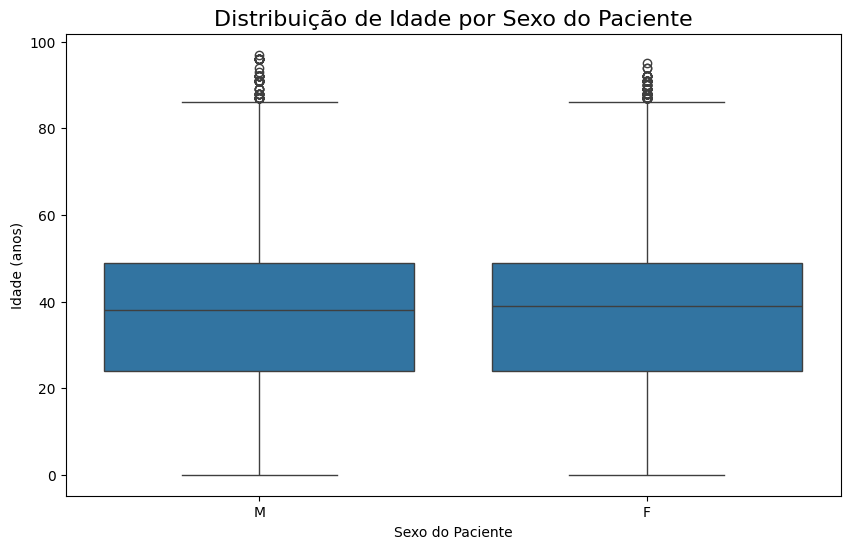

In [31]:
plt.figure(figsize=(10, 6)) 

sns.boxplot(
    x='sexo_paciente', 
    y='idade_paciente', 
    data=df
)

plt.title('Distribuição de Idade por Sexo do Paciente', fontsize=16)
plt.xlabel('Sexo do Paciente')
plt.ylabel('Idade (anos)')
plt.show()